In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
iris=datasets.load_iris()

In [3]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df["target"]=iris.target

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(149, 5)

In [10]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [11]:
columns=["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]

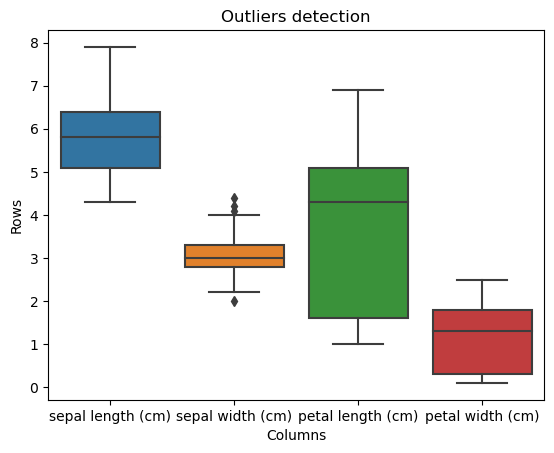

In [12]:
sns.boxplot(data=df[columns])
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.title("Outliers detection")
plt.show()

In [13]:
x=df.drop("target",axis=1)
y=df["target"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=30,stratify=y)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn=KNeighborsClassifier(n_neighbors=4,metric="manhattan")

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [19]:
knn.score(x_train,y_train)

0.957983193277311

In [20]:
knn.score(x_test,y_test)

0.9333333333333333

In [21]:
train_score=[]
test_score=[]

for i in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=i,metric="manhattan")
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

<function matplotlib.pyplot.show(close=None, block=None)>

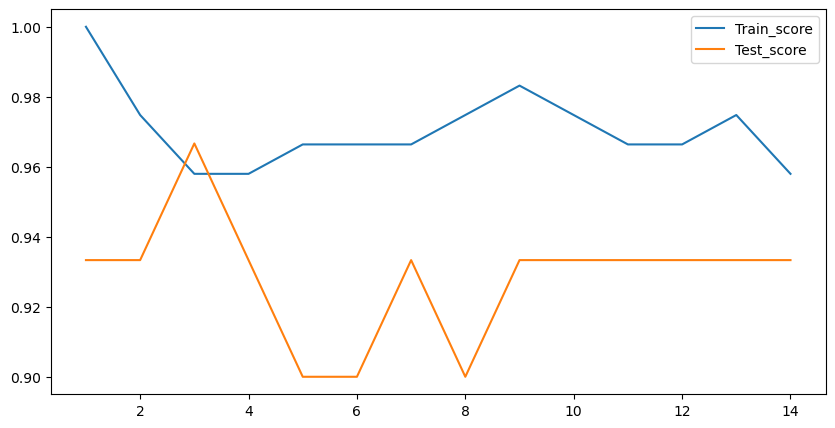

In [22]:
rg= list(range(1,15))
plt.figure(figsize=(10,5))
plt.plot(rg,train_score,label="Train_score")
plt.plot(rg,test_score,label="Test_score")
plt.legend()
plt.show

In [23]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

print("the training score: ",knn.score(x_train,y_train))
print("the testing scorknne: ",knn.score(x_test,y_test))

the training score:  0.957983193277311
the testing scorknne:  0.9666666666666667


In [24]:
knn_prob= knn.predict_proba(x_test)

In [25]:
knn_prob=knn_prob[:,1]

In [26]:
result= pd.DataFrame(knn_prob,columns=["KNN_Prob"])

In [27]:
result

,KNN_Prob
0,0.000000
1,0.333333
2,0.000000
3,1.000000
4,1.000000
5,0.000000
6,0.000000
7,0.000000
8,0.000000
9,1.000000


In [28]:
pred= knn.predict(x_test)

In [29]:
pred

array([2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0,
       1, 1, 1, 1, 2, 2, 0, 2])

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtc= DecisionTreeClassifier(random_state=42,criterion="entropy")

In [32]:
dtc.fit(x_train,y_train)
print("the training score: ",dtc.score(x_train,y_train))
print("the testing score: ",dtc.score(x_test,y_test))

the training score:  1.0
the testing score:  0.9


In [33]:
dtc_prob= dtc.predict_proba(x_test)[:,1]

In [34]:
result["DTC_prob"]= dtc_prob

In [35]:
result

,KNN_Prob,DTC_prob
0,0.000000,0.0
1,0.333333,0.0
2,0.000000,0.0
3,1.000000,1.0
4,1.000000,1.0
5,0.000000,0.0
6,0.000000,0.0
7,0.000000,0.0
8,0.000000,0.0
9,1.000000,1.0


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr=LogisticRegression()

In [38]:
lr.fit(x_train,y_train)
print("the trainig score:",lr.score(x_train,y_train))
print("the testing score: ",lr.score(x_test,y_test))

the trainig score: 0.9663865546218487
the testing score:  0.9333333333333333


In [39]:
lr_prob= lr.predict_proba(x_test)[:,1]
result["Logic_prob"]= lr_prob

In [40]:
result

,KNN_Prob,DTC_prob,Logic_prob
0,0.000000,0.0,0.034863
1,0.333333,0.0,0.191302
2,0.000000,0.0,0.015577
3,1.000000,1.0,0.894579
4,1.000000,1.0,0.925255
5,0.000000,0.0,0.021203
6,0.000000,0.0,0.033186
7,0.000000,0.0,0.053235
8,0.000000,0.0,0.045328
9,1.000000,1.0,0.802891


In [41]:
result["Prob_avg"]= (result["KNN_Prob"]+result["DTC_prob"]+result["Logic_prob"])/3

In [42]:
result

,KNN_Prob,DTC_prob,Logic_prob,Prob_avg
0,0.000000,0.0,0.034863,0.011621
1,0.333333,0.0,0.191302,0.174878
2,0.000000,0.0,0.015577,0.005192
3,1.000000,1.0,0.894579,0.964860
4,1.000000,1.0,0.925255,0.975085
5,0.000000,0.0,0.021203,0.007068
6,0.000000,0.0,0.033186,0.011062
7,0.000000,0.0,0.053235,0.017745
8,0.000000,0.0,0.045328,0.015109
9,1.000000,1.0,0.802891,0.934297


In [43]:
vr=[]
for i in result["Prob_avg"]:
    if i<0.5:
        vr.append(0)
    else:
        vr.append(1)

In [44]:
result["Output"]= vr

In [45]:
result

,KNN_Prob,DTC_prob,Logic_prob,Prob_avg,Output
0,0.000000,0.0,0.034863,0.011621,0
1,0.333333,0.0,0.191302,0.174878,0
2,0.000000,0.0,0.015577,0.005192,0
3,1.000000,1.0,0.894579,0.964860,1
4,1.000000,1.0,0.925255,0.975085,1
5,0.000000,0.0,0.021203,0.007068,0
6,0.000000,0.0,0.033186,0.011062,0
7,0.000000,0.0,0.053235,0.017745,0
8,0.000000,0.0,0.045328,0.015109,0
9,1.000000,1.0,0.802891,0.934297,1


In [46]:
result['Actual_value']=np.array(y_test)

In [47]:
result

,KNN_Prob,DTC_prob,Logic_prob,Prob_avg,Output,Actual_value
0,0.000000,0.0,0.034863,0.011621,0,2
1,0.333333,0.0,0.191302,0.174878,0,2
2,0.000000,0.0,0.015577,0.005192,0,0
3,1.000000,1.0,0.894579,0.964860,1,1
4,1.000000,1.0,0.925255,0.975085,1,1
5,0.000000,0.0,0.021203,0.007068,0,0
6,0.000000,0.0,0.033186,0.011062,0,0
7,0.000000,0.0,0.053235,0.017745,0,0
8,0.000000,0.0,0.045328,0.015109,0,2
9,1.000000,1.0,0.802891,0.934297,1,1


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
con= confusion_matrix(result["Actual_value"],result["Output"])
print(con)

[[10  0  0]
 [ 1  9  0]
 [ 8  2  0]]


In [50]:
from sklearn.metrics import accuracy_score

In [51]:
acc= accuracy_score(result["Actual_value"],result["Output"])
acc

0.6333333333333333

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [53]:
model_dic={"Random_Forest_Classifier":RandomForestClassifier(), 
"Ada_Boost_Classifier":AdaBoostClassifier(),
"Gradient_Boosting_Classifier":GradientBoostingClassifier(),
"Decision_Tree_Classifier":DecisionTreeClassifier(),
"Logistic_Regression":LogisticRegression(),"KNeighborsClassifier":KNeighborsClassifier(n_neighbors=3,metric="manhattan")}

In [54]:
train_score={}
test_score={}
train_prob={}
test_prob={}
for name,model in model_dic.items():
    model.fit(x_train,y_train)
    train_score[name]=model.score(x_train,y_train)
    test_score[name]=model.score(x_test,y_test)
    train_t= model.predict_proba(x_train)
    test_t=model.predict_proba(x_test)
    train_prob[name]=train_t[:,1]
    test_prob[name]=test_t[:,1]

In [55]:
train_score

{'Random_Forest_Classifier': 1.0,
 'Ada_Boost_Classifier': 0.9831932773109243,
 'Gradient_Boosting_Classifier': 1.0,
 'Decision_Tree_Classifier': 1.0,
 'Logistic_Regression': 0.9663865546218487,
 'KNeighborsClassifier': 0.957983193277311}

In [56]:
test_score

{'Random_Forest_Classifier': 0.8666666666666667,
 'Ada_Boost_Classifier': 0.8666666666666667,
 'Gradient_Boosting_Classifier': 0.9,
 'Decision_Tree_Classifier': 0.9,
 'Logistic_Regression': 0.9333333333333333,
 'KNeighborsClassifier': 0.9666666666666667}

In [57]:
result=pd.DataFrame(train_score.keys(),columns=["Model_name"])
result["Train_Evaluation_value"]=train_score.values()
result["Test_Evaluation_value"]=test_score.values()

In [58]:
result

,Model_name,Train_Evaluation_value,Test_Evaluation_value
0,Random_Forest_Classifier,1.000000,0.866667
1,Ada_Boost_Classifier,0.983193,0.866667
2,Gradient_Boosting_Classifier,1.000000,0.900000
3,Decision_Tree_Classifier,1.000000,0.900000
4,Logistic_Regression,0.966387,0.933333
5,KNeighborsClassifier,0.957983,0.966667


In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn=KNeighborsClassifier(n_neighbors=3,metric="manhattan")

In [61]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [62]:
knn.score(x_train,y_train)

0.957983193277311

In [63]:
knn.score(x_test,y_test)

0.9666666666666667

In [64]:
pred=knn.predict(x_test)

In [65]:
result=pd.DataFrame(pred,columns=["Predictions"])

In [66]:
result['Actual_value']=np.array(y_test)

In [67]:
result

,Predictions,Actual_value
0,2,2
1,2,2
2,0,0
3,1,1
4,1,1
5,0,0
6,0,0
7,0,0
8,2,2
9,1,1


In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
cn= confusion_matrix(pred,y_test)
print(cn)

[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]


In [72]:
sepal_length=float(input('sepal length='))
sepal_width=float(input('sepal width='))
petal_length=float(input('petal length='))
petal_width=float(input('petal width='))

sepal length=1.2
sepal width=1.6
petal length=0.2
petal width=1.2


In [74]:
data=[[sepal_length,sepal_width,petal_length,petal_width]]

In [75]:
data

[[1.2, 1.6, 0.2, 1.2]]

In [77]:
knn.predict(data)

array([0])

In [78]:
import joblib 


In [79]:
joblib.dump(knn,"Final_Project_model")

['Final_Project_model']